In [68]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths
import matplotlib.cm as cm



In [69]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Maximum Ablation 

Grounding Line Plot - Amin = -13


In [70]:
gl_run_title_amin13 = str("Grounding Line Evolution Over Time - Max Ablation = -13 m/yr")
amin13 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_15__22_07_30.pkl.gz"
with gzip.open(amin13, 'rb') as f:
    DATA_dict_amin13 = pickle.load(f)

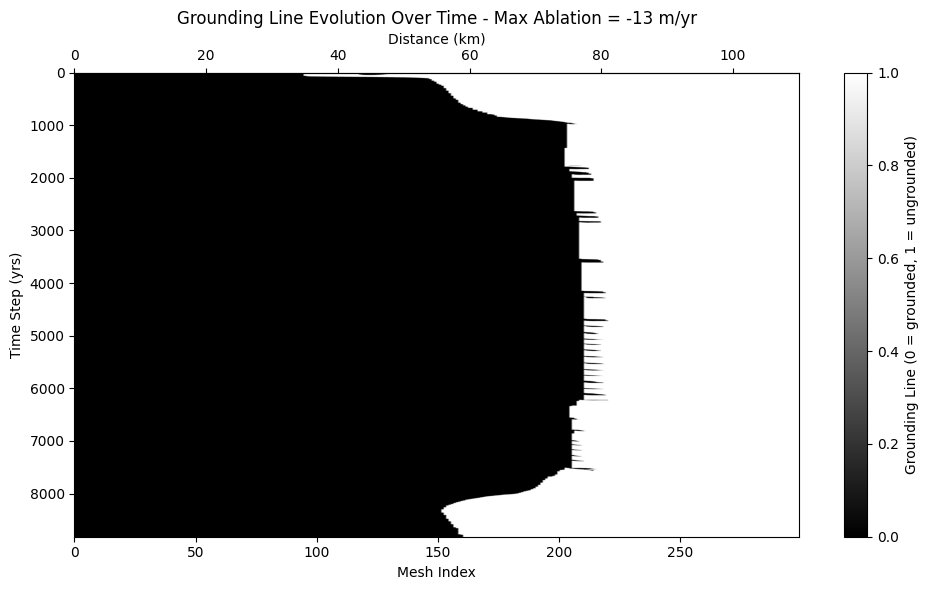

In [71]:
GL_dict = DATA_dict_amin13['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin13)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [72]:
gl_positions_amin13 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin13.append(idx)

gl_positions_amin13 = np.array(gl_positions_amin13)
GL_km_amin13 = mesh_index_to_km(gl_positions_amin13)



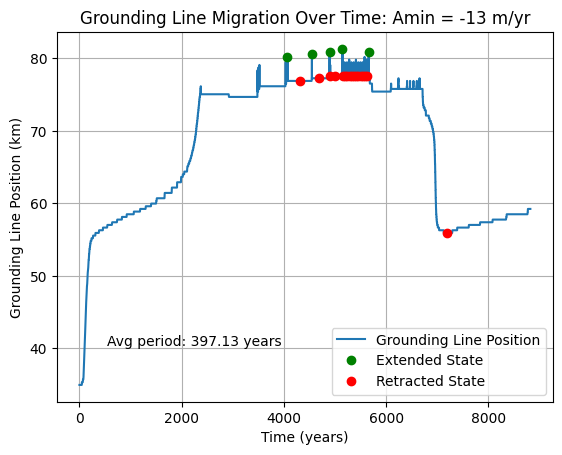

Mean cycle period: 397.13 years
[478.40249788 345.00501429 252.46259997 512.66243518]
Mean advance amplitude: 80.79 km
[80.2006689  80.56856187 80.93645485 81.30434783 80.93645485]
Mean retreat amplitude: 76.28 km
[76.88963211 77.25752508 77.62541806 77.62541806 77.62541806 77.62541806
 77.62541806 77.62541806 77.62541806 77.62541806 77.62541806 77.62541806
 77.62541806 77.62541806 77.62541806 77.62541806 55.91973244]


In [73]:
peaks_amin13, _ = find_peaks(GL_km_amin13, prominence=3) 
troughs_amin13, _ = find_peaks(-GL_km_amin13, prominence=3)     
periods_amin13 = np.diff(np.array(time)[peaks_amin13])
adv_dists_amin13 = GL_km_amin13[peaks_amin13]
ret_dists_amin13 = GL_km_amin13[troughs_amin13]


plt.plot(time, GL_km_amin13, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin13], GL_km_amin13[peaks_amin13], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin13], GL_km_amin13[troughs_amin13], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin13):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -13 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin13):.2f} years")
print(periods_amin13)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin13):.2f} km")
print(adv_dists_amin13)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin13):.2f} km")
print(ret_dists_amin13)


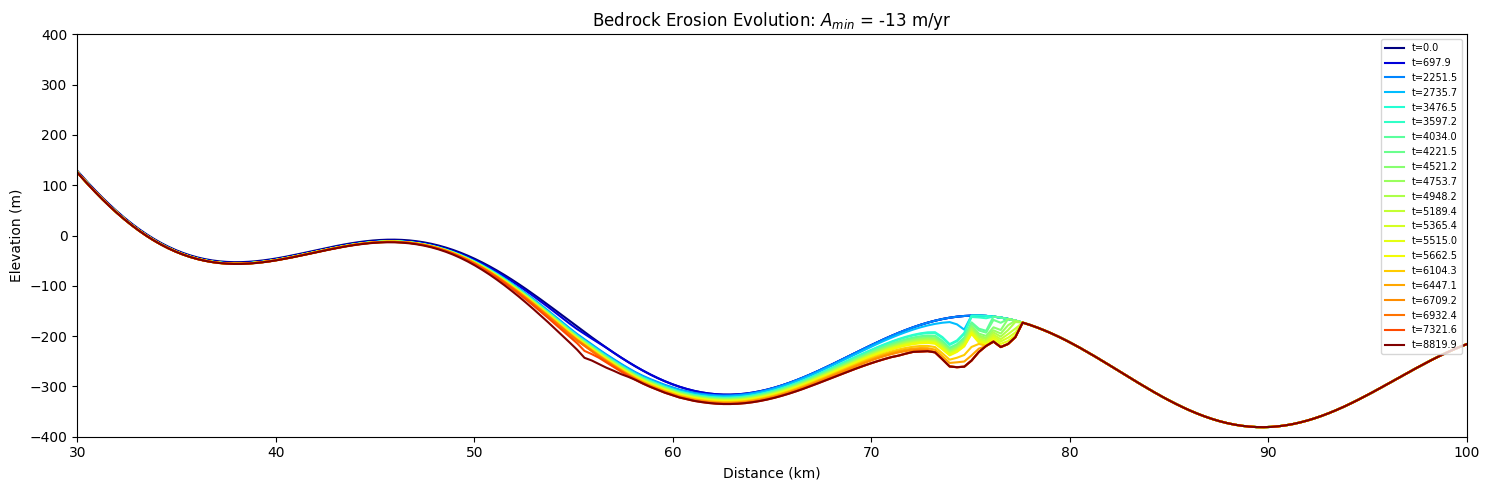

In [74]:
bed_dict = DATA_dict_amin13['bed_dict']
num_points = len(next(iter(bed_dict.values())))
x_km = mesh_index_to_km(np.arange(num_points))
time = list(bed_dict.keys())
# bed_profile = bed_dict[timesteps[0]] 
norm = plt.Normalize(min(time), max(time))
cmap = cm.jet

fig, ax1 = plt.subplots(figsize=(15,5))

for i, t in enumerate(time):
    if i % 400 != 0:  
        continue

    bed = bed_dict[t]
    color = cmap(norm(t))
    plt.plot(x_km, bed, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

plt.xlabel("Distance (km)")
plt.ylabel("Elevation (m)")
plt.title("Bedrock Erosion Evolution: $A_{min}$ = -13 m/yr")
# plt.gca().invert_xaxis() 
plt.legend(loc="upper right", fontsize=7)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.xlim(30,100)
plt.ylim(-400,400)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/Bedrock_Evo_amin13.svg", format ="svg", bbox_inches='tight')

Grounding Line Plot - Amin = -14


In [75]:
gl_run_title_amin14 = str("Grounding Line Evolution Over Time - Max Ablation = -14 m/yr")
amin14 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_14__23_35_17.pkl.gz"
with gzip.open(amin14, 'rb') as f:
    DATA_dict_amin14 = pickle.load(f)

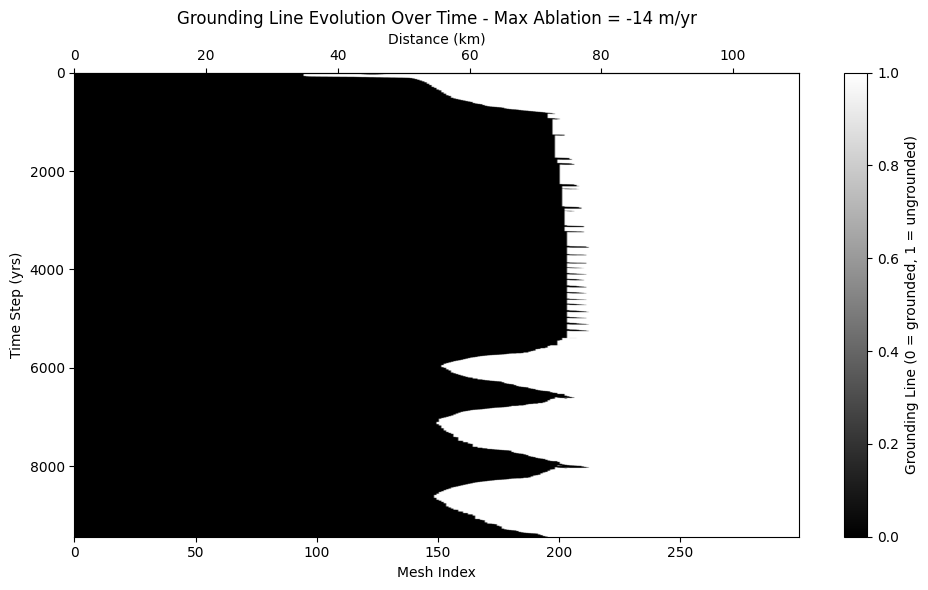

In [76]:
GL_dict = DATA_dict_amin14['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin14)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [77]:
gl_positions_amin14 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin14.append(idx)

gl_positions_amin14 = np.array(gl_positions_amin14)
GL_km_amin14 = mesh_index_to_km(gl_positions_amin14)



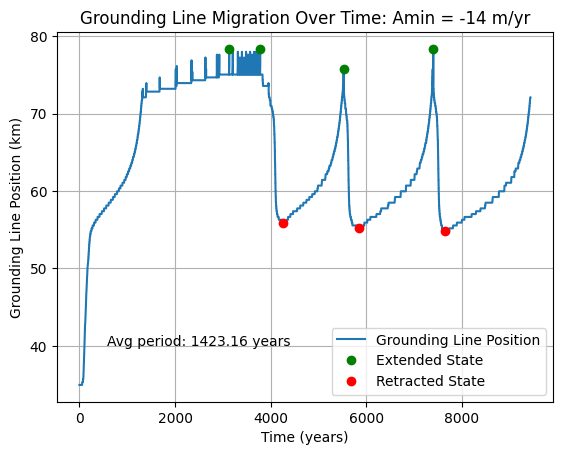

Mean cycle period: 1423.16 years
[ 647.48059191 1747.43680918 1874.57702578]
Mean advance amplitude: 77.72 km
[78.36120401 78.36120401 75.78595318 78.36120401]
Mean retreat amplitude: 55.31 km
[55.91973244 55.18394649 54.81605351]


In [78]:
peaks_amin14, _ = find_peaks(GL_km_amin14, prominence=10) 
troughs_amin14, _ = find_peaks(-GL_km_amin14, prominence=10)     
periods_amin14 = np.diff(np.array(time)[peaks_amin14])
adv_dists_amin14 = GL_km_amin14[peaks_amin14]
ret_dists_amin14 = GL_km_amin14[troughs_amin14]


plt.plot(time, GL_km_amin14, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin14], GL_km_amin14[peaks_amin14], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin14], GL_km_amin14[troughs_amin14], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin14):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -14 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin14):.2f} years")
print(periods_amin14)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin14):.2f} km")
print(adv_dists_amin14)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin14):.2f} km")
print(ret_dists_amin14)


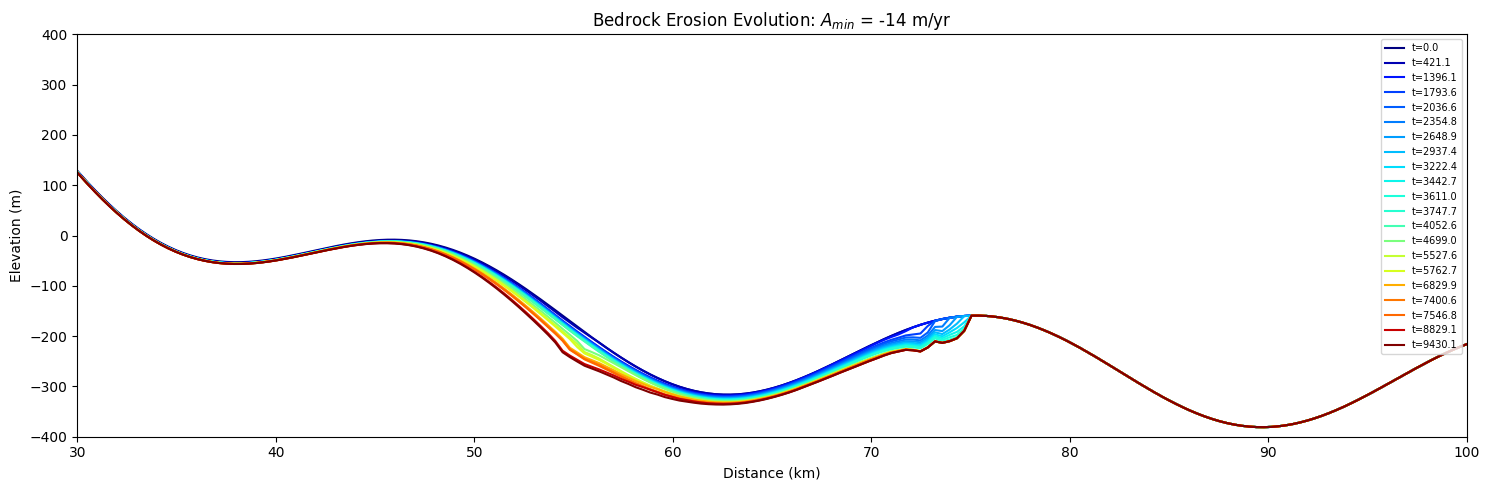

In [79]:
bed_dict = DATA_dict_amin14['bed_dict']
num_points = len(next(iter(bed_dict.values())))
x_km = mesh_index_to_km(np.arange(num_points))
time = list(bed_dict.keys())
# bed_profile = bed_dict[timesteps[0]] 
norm = plt.Normalize(min(time), max(time))
cmap = cm.jet

fig, ax1 = plt.subplots(figsize=(15,5))

for i, t in enumerate(time):
    if i % 400 != 0:  
        continue

    bed = bed_dict[t]
    color = cmap(norm(t))
    plt.plot(x_km, bed, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

plt.xlabel("Distance (km)")
plt.ylabel("Elevation (m)")
plt.title("Bedrock Erosion Evolution: $A_{min}$ = -14 m/yr")
# plt.gca().invert_xaxis() 
plt.legend(loc="upper right", fontsize=7)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.xlim(30,100)
plt.ylim(-400,400)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/Bedrock_Evo_amin13.svg", format ="svg", bbox_inches='tight')

Grounding Line Plot - Amin = -15


In [80]:
gl_run_title_amin15 = str("Grounding Line Evolution Over Time - Max Ablation = -15 m/yr")
amin15 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_14__22_43_20.pkl.gz"
with gzip.open(amin15, 'rb') as f:
    DATA_dict_amin15 = pickle.load(f)

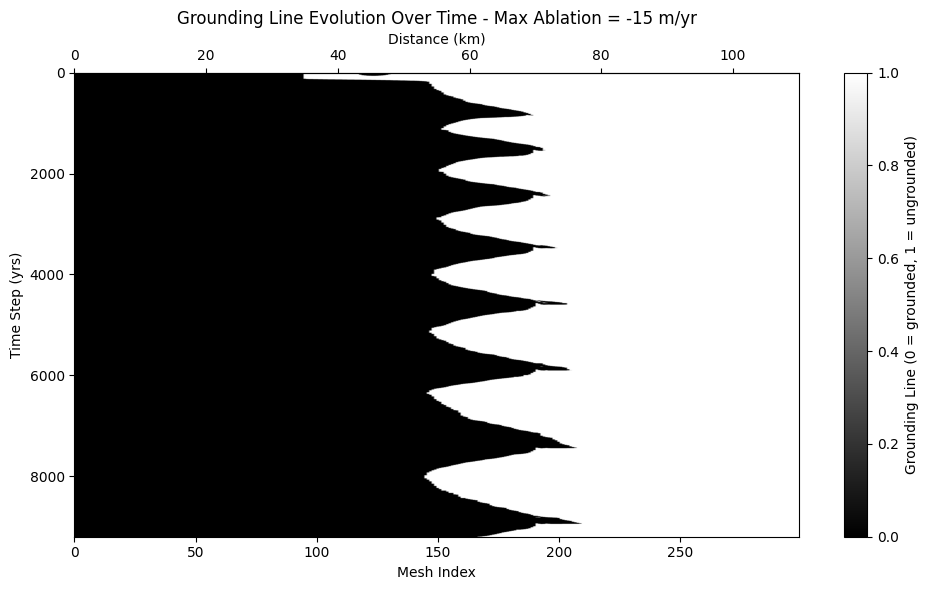

In [81]:
GL_dict = DATA_dict_amin15['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin15)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [82]:
gl_positions_amin15 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin15.append(idx)

gl_positions_amin15 = np.array(gl_positions_amin15)
GL_km_amin15 = mesh_index_to_km(gl_positions_amin15)



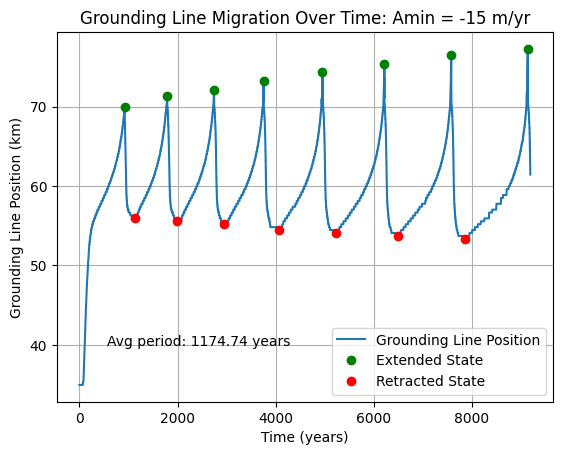

Mean cycle period: 1174.74 years
[ 866.91780377  957.96403081 1010.40555947 1201.2294693  1262.52865801
 1363.6968341  1560.42367232]
Mean advance amplitude: 73.76 km
[69.89966555 71.37123746 72.10702341 73.21070234 74.31438127 75.4180602
 76.52173913 77.25752508]
Mean retreat amplitude: 54.61 km
[55.91973244 55.55183946 55.18394649 54.44816054 54.08026756 53.71237458
 53.34448161]


In [83]:
peaks_amin15, _ = find_peaks(GL_km_amin15, prominence=10) 
troughs_amin15, _ = find_peaks(-GL_km_amin15, prominence=10)     
periods_amin15 = np.diff(np.array(time)[peaks_amin15])
adv_dists_amin15 = GL_km_amin15[peaks_amin15]
ret_dists_amin15 = GL_km_amin15[troughs_amin15]


plt.plot(time, GL_km_amin15, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin15], GL_km_amin15[peaks_amin15], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin15], GL_km_amin15[troughs_amin15], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin15):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -15 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin15):.2f} years")
print(periods_amin15)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin15):.2f} km")
print(adv_dists_amin15)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin15):.2f} km")
print(ret_dists_amin15)


Grounding Line Plot - Amin = -16


In [84]:
gl_run_title_amin16 = str("Grounding Line Evolution Over Time - Max Ablation = -16 m/yr")
amin16 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_03_14__14_04_13.pkl.gz"
with gzip.open(amin16, 'rb') as f:
    DATA_dict_amin16 = pickle.load(f)

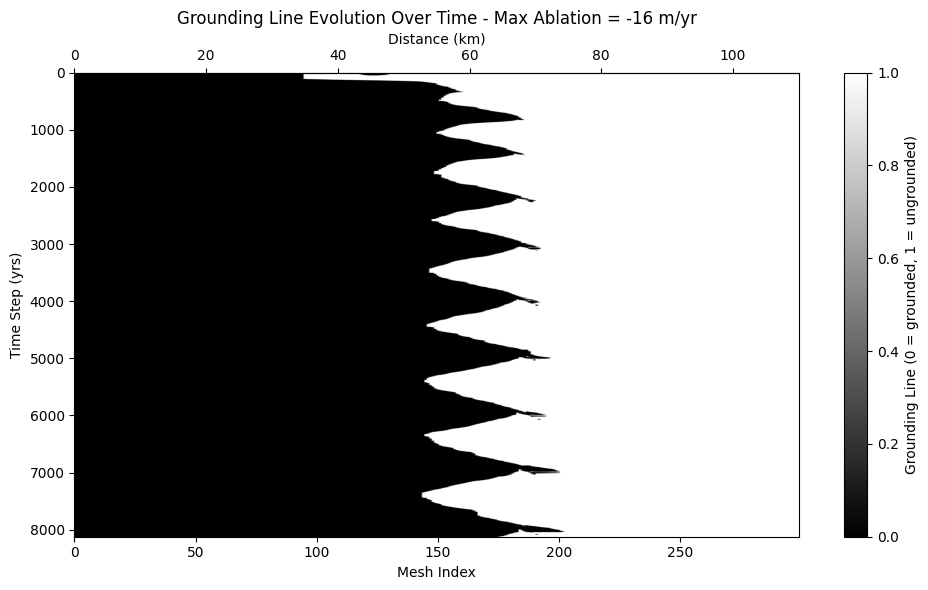

In [85]:
GL_dict = DATA_dict_amin16['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin16)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [86]:
gl_positions_amin16 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin16.append(idx)

gl_positions_amin16 = np.array(gl_positions_amin16)
GL_km_amin16 = mesh_index_to_km(gl_positions_amin16)



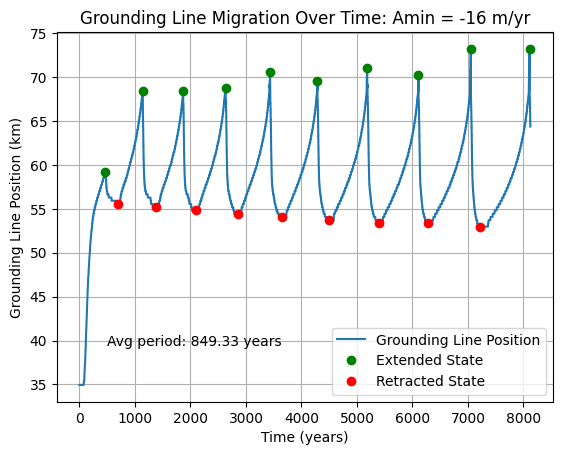

Mean cycle period: 849.33 years
[ 671.04104519  731.17664818  765.35723967  801.83053734  850.85569445
  897.86178343  923.5788195   943.37435896 1058.89407233]
Mean advance amplitude: 69.27 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 71.00334448 70.26755853 73.21070234 73.21070234]
Mean retreat amplitude: 54.16 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863]


In [87]:
peaks_amin16, _ = find_peaks(GL_km_amin16, prominence=3) 
troughs_amin16, _ = find_peaks(-GL_km_amin16, prominence=3)     
periods_amin16 = np.diff(np.array(time)[peaks_amin16])
adv_dists_amin16 = GL_km_amin16[peaks_amin16]
ret_dists_amin16 = GL_km_amin16[troughs_amin16]


plt.plot(time, GL_km_amin16, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin16], GL_km_amin16[peaks_amin16], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin16], GL_km_amin16[troughs_amin16], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin16):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -16 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin16):.2f} years")
print(periods_amin16)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin16):.2f} km")
print(adv_dists_amin16)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin16):.2f} km")
print(ret_dists_amin16)


Grounding Line Plot - Amin = -17


In [88]:
gl_run_title_amin17 = str("Grounding Line Evolution Over Time - Max Ablation = -17 m/yr")
amin17 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_15__23_06_45.pkl.gz"
with gzip.open(amin17, 'rb') as f:
    DATA_dict_amin17 = pickle.load(f)

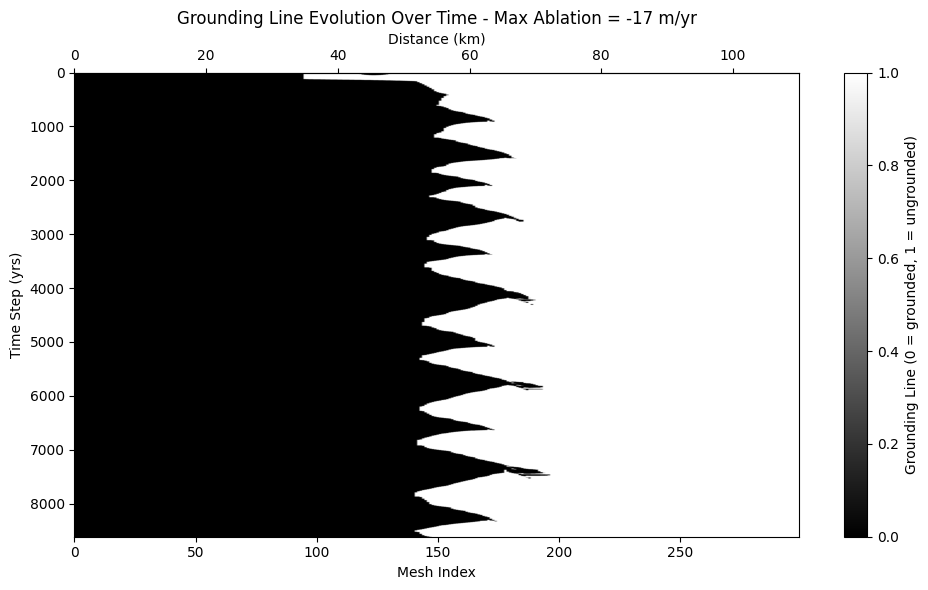

In [89]:
GL_dict = DATA_dict_amin17['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin17)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [90]:
gl_positions_amin17 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin17.append(idx)

gl_positions_amin17 = np.array(gl_positions_amin17)
GL_km_amin17 = mesh_index_to_km(gl_positions_amin17)



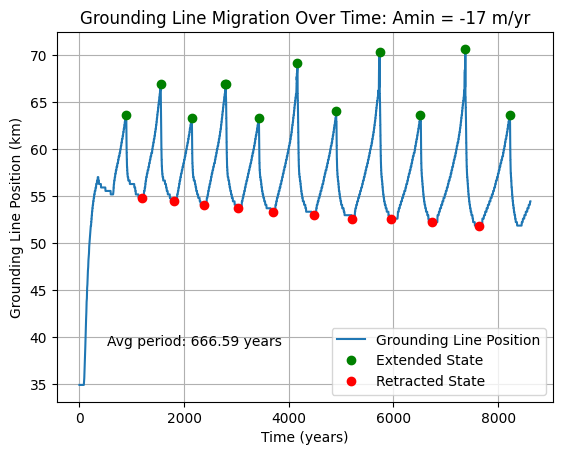

Mean cycle period: 666.59 years
[665.43776067 589.66090237 647.93497649   3.968466   629.49786133
 742.77146504 741.703438   827.96566435 779.62596172 859.87350675
 844.02480035]
Mean advance amplitude: 66.04 km
[63.64548495 66.95652174 63.27759197 66.95652174 66.95652174 63.27759197
 69.1638796  64.01337793 70.26755853 63.64548495 70.63545151 63.64548495]
Mean retreat amplitude: 53.27 km
[54.81605351 54.44816054 54.08026756 53.71237458 53.34448161 52.97658863
 52.60869565 52.60869565 52.24080268 51.8729097 ]


In [91]:
peaks_amin17, _ = find_peaks(GL_km_amin17, prominence=4) 
troughs_amin17, _ = find_peaks(-GL_km_amin17, prominence=4)     
periods_amin17 = np.diff(np.array(time)[peaks_amin17])
adv_dists_amin17 = GL_km_amin17[peaks_amin17]
ret_dists_amin17 = GL_km_amin17[troughs_amin17]


plt.plot(time, GL_km_amin17, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin17], GL_km_amin17[peaks_amin17], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin17], GL_km_amin17[troughs_amin17], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin17):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -17 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin17):.2f} years")
print(periods_amin17)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin17):.2f} km")
print(adv_dists_amin17)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin17):.2f} km")
print(ret_dists_amin17)


Grounding Line Plot - Amin = -18


In [92]:
gl_run_title_amin18 = str("Grounding Line Evolution Over Time - Max Ablation = -18 m/yr")
amin18 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__00_04_25.pkl.gz"
with gzip.open(amin18, 'rb') as f:
    DATA_dict_amin18 = pickle.load(f)

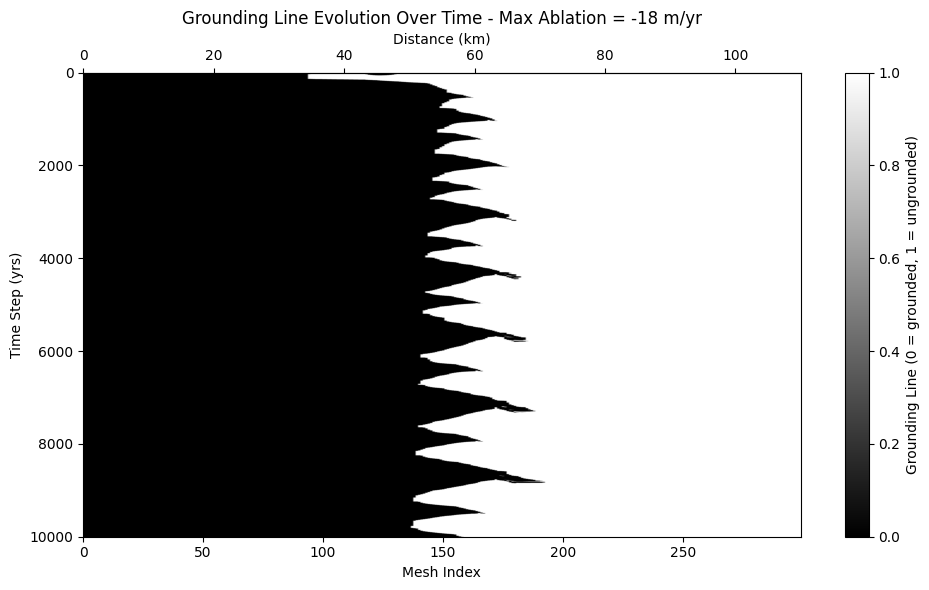

In [93]:
GL_dict = DATA_dict_amin18['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin18)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [94]:
gl_positions_amin18 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin18.append(idx)

gl_positions_amin18 = np.array(gl_positions_amin18)
GL_km_amin18 = mesh_index_to_km(gl_positions_amin18)



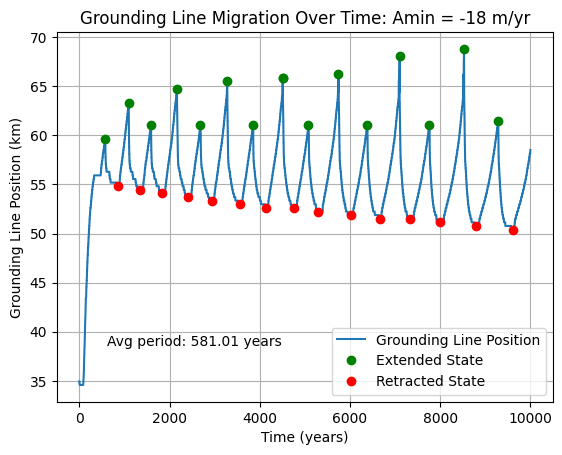

Mean cycle period: 581.01 years
[520.4382772  493.91218331 578.1328926  521.35177573 593.20447255
 571.05644714 658.58258053   4.23916198 570.8481135  664.78320292
 636.00128182 720.78015751 656.0238524  773.48240793 752.30479227]
Mean advance amplitude: 63.48 km
[59.59866221 63.27759197 61.07023411 64.74916388 61.07023411 65.48494983
 61.07023411 65.85284281 65.85284281 61.07023411 66.22073579 61.07023411
 68.06020067 61.07023411 68.79598662 61.43812709]
Mean retreat amplitude: 52.54 km
[54.81605351 54.44816054 54.08026756 53.71237458 53.34448161 52.97658863
 52.60869565 52.60869565 52.24080268 51.8729097  51.50501672 51.50501672
 51.13712375 50.76923077 50.40133779]


In [95]:
peaks_amin18, _ = find_peaks(GL_km_amin18, prominence=3) 
troughs_amin18, _ = find_peaks(-GL_km_amin18, prominence=3)     
periods_amin18 = np.diff(np.array(time)[peaks_amin18])
adv_dists_amin18 = GL_km_amin18[peaks_amin18]
ret_dists_amin18 = GL_km_amin18[troughs_amin18]


plt.plot(time, GL_km_amin18, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin18], GL_km_amin18[peaks_amin18], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin18], GL_km_amin18[troughs_amin18], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin18):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -18 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin18):.2f} years")
print(periods_amin18)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin18):.2f} km")
print(adv_dists_amin18)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin18):.2f} km")
print(ret_dists_amin18)


Grounding Line Plot - Amin = -19


In [96]:
gl_run_title_amin19 = str("Grounding Line Evolution Over Time - Max Ablation = -19 m/yr")
amin19 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__10_14_18.pkl.gz"
with gzip.open(amin19, 'rb') as f:
    DATA_dict_amin19 = pickle.load(f)

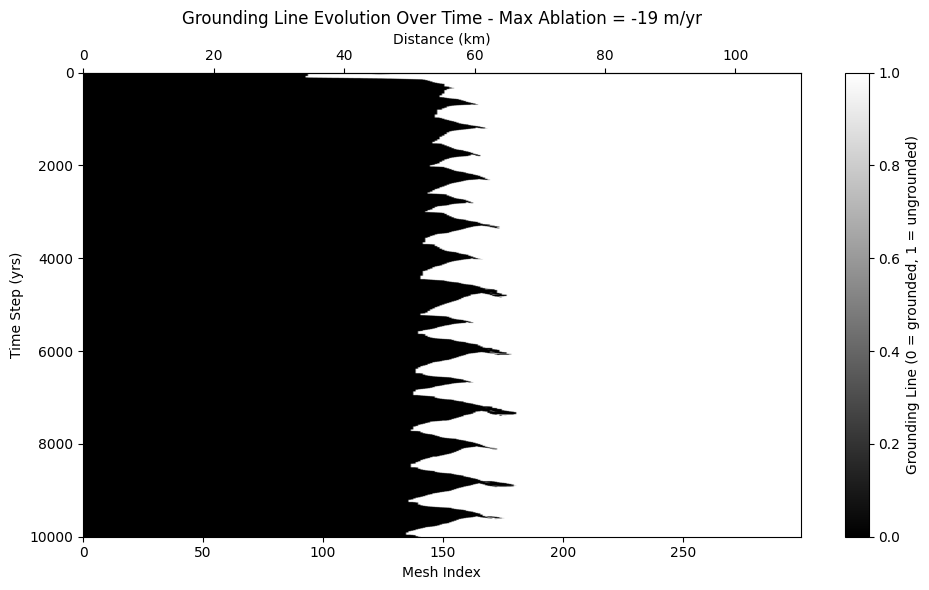

In [97]:
GL_dict = DATA_dict_amin19['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin19)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [98]:
gl_positions_amin19 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin19.append(idx)

gl_positions_amin19 = np.array(gl_positions_amin19)
GL_km_amin19 = mesh_index_to_km(gl_positions_amin19)



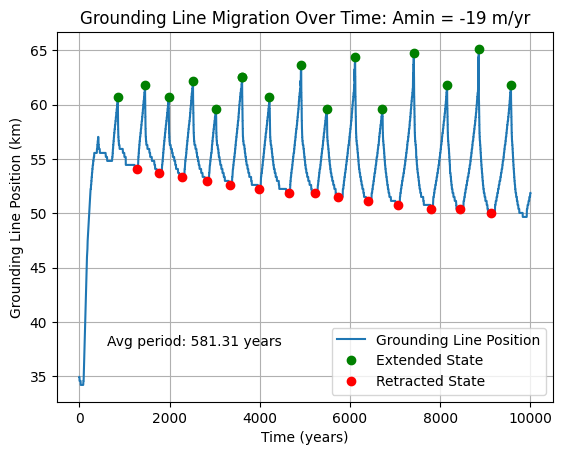

Mean cycle period: 581.31 years
[603.91539229 521.98260659 540.95478548 507.62469883 576.02985495
   5.24994272 608.14615038 698.91774032 569.71362983 632.91126115
 601.98469149 700.06023834 735.9402366  704.84615943 711.40048865]
Mean advance amplitude: 61.97 km
[60.70234114 61.80602007 60.70234114 62.17391304 59.59866221 62.54180602
 62.54180602 60.70234114 63.64548495 59.59866221 64.3812709  59.59866221
 64.74916388 61.80602007 65.11705686 61.80602007]
Mean retreat amplitude: 51.93 km
[54.08026756 53.71237458 53.34448161 52.97658863 52.60869565 52.24080268
 51.8729097  51.8729097  51.50501672 51.13712375 50.76923077 50.40133779
 50.40133779 50.03344482]


In [99]:
peaks_amin19, _ = find_peaks(GL_km_amin19, prominence=3) 
troughs_amin19, _ = find_peaks(-GL_km_amin19, prominence=3)     
periods_amin19 = np.diff(np.array(time)[peaks_amin19])
adv_dists_amin19 = GL_km_amin19[peaks_amin19]
ret_dists_amin19 = GL_km_amin19[troughs_amin19]


plt.plot(time, GL_km_amin19, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin19], GL_km_amin19[peaks_amin19], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin19], GL_km_amin19[troughs_amin19], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin19):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -19 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin19):.2f} years")
print(periods_amin19)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin19):.2f} km")
print(adv_dists_amin19)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin19):.2f} km")
print(ret_dists_amin19)


Grounding Line Plot - Amin = -20


In [100]:
gl_run_title_amin20 = str("Grounding Line Evolution Over Time - Max Ablation = -20 m/yr")
amin20 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__11_32_03.pkl.gz"
with gzip.open(amin20, 'rb') as f:
    DATA_dict_amin20 = pickle.load(f)

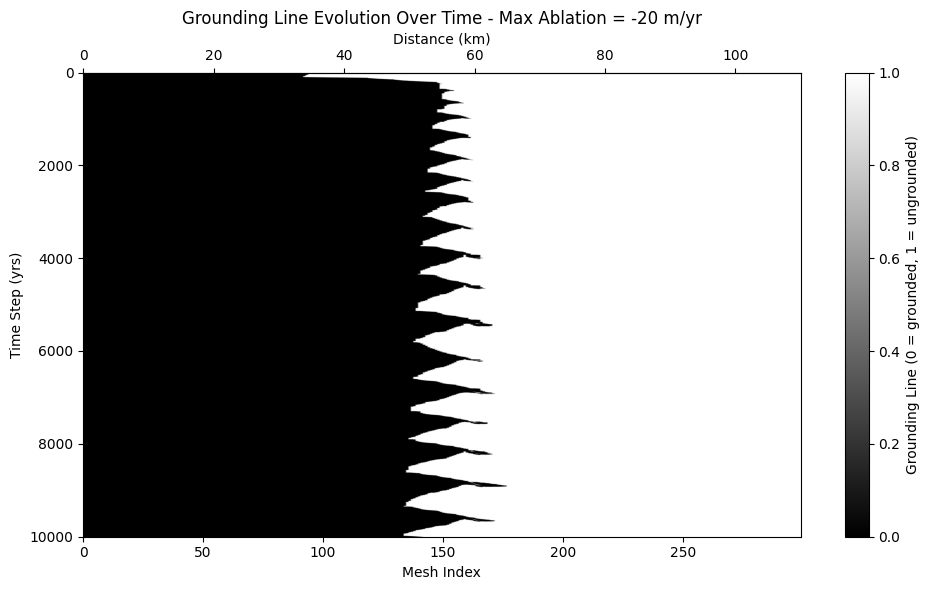

In [101]:
GL_dict = DATA_dict_amin20['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin20)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [102]:
gl_positions_amin20 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin20.append(idx)

gl_positions_amin20 = np.array(gl_positions_amin20)
GL_km_amin20 = mesh_index_to_km(gl_positions_amin20)



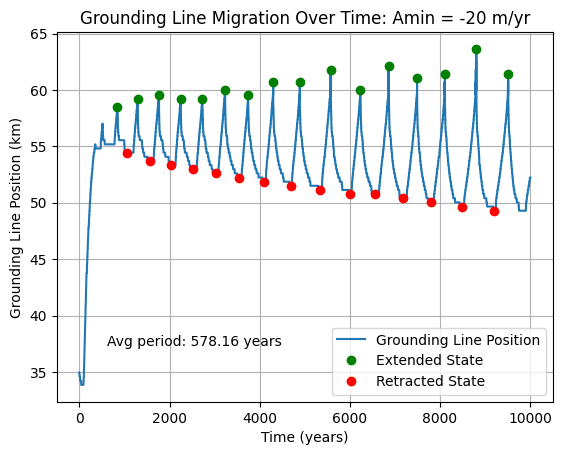

Mean cycle period: 578.16 years
[447.92001031 469.99554048 483.91393744 481.33054288 506.34757831
 513.39142089 556.21548632 589.35741886 686.0647692  660.28446623
 627.04418199 627.89747837 618.00199572 696.63642725 708.07174731]
Mean advance amplitude: 60.52 km
[58.49498328 59.23076923 59.59866221 59.23076923 59.23076923 59.96655518
 59.59866221 60.70234114 60.70234114 61.80602007 59.96655518 62.17391304
 61.07023411 61.43812709 63.64548495 61.43812709]
Mean retreat amplitude: 51.65 km
[54.44816054 53.71237458 53.34448161 52.97658863 52.60869565 52.24080268
 51.8729097  51.50501672 51.13712375 50.76923077 50.76923077 50.40133779
 50.03344482 49.66555184 49.29765886]


In [103]:
peaks_amin20, _ = find_peaks(GL_km_amin20, prominence=3) 
troughs_amin20, _ = find_peaks(-GL_km_amin20, prominence=3)     
periods_amin20 = np.diff(np.array(time)[peaks_amin20])
adv_dists_amin20 = GL_km_amin20[peaks_amin20]
ret_dists_amin20 = GL_km_amin20[troughs_amin20]


plt.plot(time, GL_km_amin20, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin20], GL_km_amin20[peaks_amin20], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin20], GL_km_amin20[troughs_amin20], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin20):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -20 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin20):.2f} years")
print(periods_amin20)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin20):.2f} km")
print(adv_dists_amin20)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin20):.2f} km")
print(ret_dists_amin20)


Grounding Line Plot - Amin = -21


In [104]:
gl_run_title_amin21 = str("Grounding Line Evolution Over Time - Max Ablation = -21 m/yr")
amin21 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__12_34_40.pkl.gz"
with gzip.open(amin21, 'rb') as f:
    DATA_dict_amin21 = pickle.load(f)

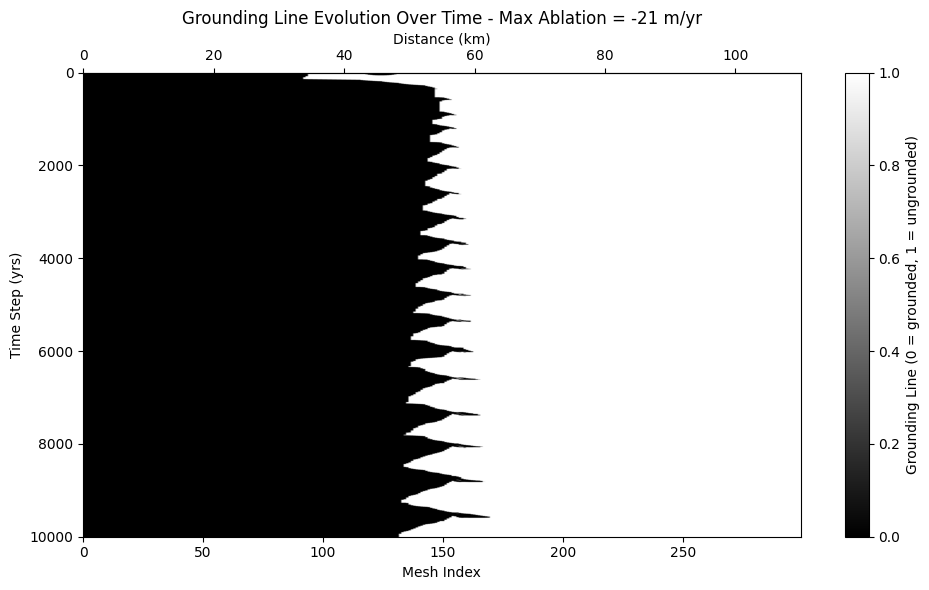

In [105]:
GL_dict = DATA_dict_amin21['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin21)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [106]:
gl_positions_amin21 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin21.append(idx)

gl_positions_amin21 = np.array(gl_positions_amin21)
GL_km_amin21 = mesh_index_to_km(gl_positions_amin21)



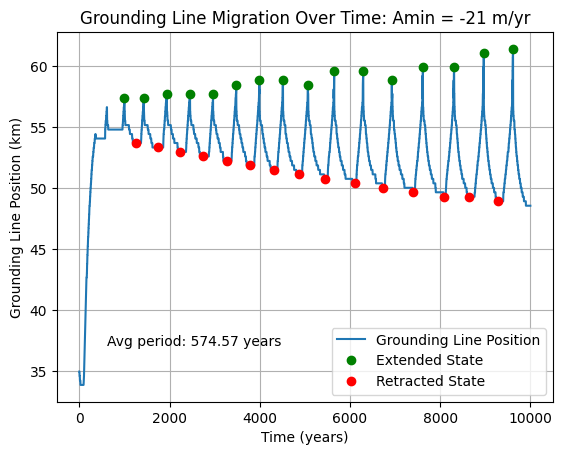

Mean cycle period: 574.57 years
[428.01724063 509.74365574 512.02667725 514.67101219 514.33086227
 513.66343957 521.39590745 554.0125351  584.07345534 644.05312749
 635.70340671 687.89531961 692.29549525 658.29717673 648.34006857]
Mean advance amplitude: 58.95 km
[57.39130435 57.39130435 57.75919732 57.75919732 57.75919732 58.49498328
 58.86287625 58.86287625 58.49498328 59.59866221 59.59866221 58.86287625
 59.96655518 59.96655518 61.07023411 61.43812709]
Mean retreat amplitude: 51.19 km
[53.71237458 53.34448161 52.97658863 52.60869565 52.24080268 51.8729097
 51.50501672 51.13712375 50.76923077 50.40133779 50.03344482 49.66555184
 49.29765886 49.29765886 48.92976589]


In [107]:
peaks_amin21, _ = find_peaks(GL_km_amin21, prominence=3) 
troughs_amin21, _ = find_peaks(-GL_km_amin21, prominence=3)     
periods_amin21 = np.diff(np.array(time)[peaks_amin21])
adv_dists_amin21 = GL_km_amin21[peaks_amin21]
ret_dists_amin21 = GL_km_amin21[troughs_amin21]


plt.plot(time, GL_km_amin21, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin21], GL_km_amin21[peaks_amin21], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin21], GL_km_amin21[troughs_amin21], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin21):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -21 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin21):.2f} years")
print(periods_amin21)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin21):.2f} km")
print(adv_dists_amin21)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin21):.2f} km")
print(ret_dists_amin21)


## Relationship Plots


In [108]:
## Climate Factor##
title_amin_cycles = str("Number of Cycles Produced  VS Maximum Ablation")
amins = np.array([-13, -14, -15, -16, -17, -18, -19, -20, -21])
amin_cycles = np.array([1, 4, 8, 11, 12, 15, 15, 16, 17])
amin_coeff = np.polyfit(amins,amin_cycles, 1)
p_amin = np.poly1d(amin_coeff)
amin_y_trend = p_amin(amins)
R_2_amin =r2_score(amin_cycles,p_amin(amins))


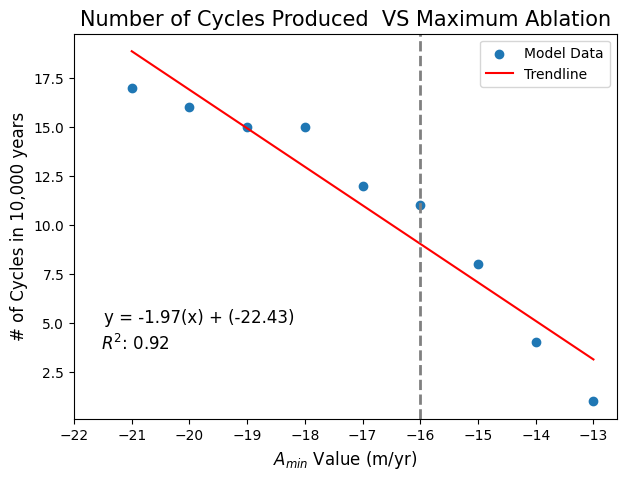

In [109]:
fig, ax1 = plt.subplots(figsize=(7,5))

plt.scatter(amins, amin_cycles, label = 'Model Data')
plt.title(title_amin_cycles, fontsize = 15)
plt.plot(amins, amin_y_trend, color='red', label='Trendline')
plt.text(0.05, 0.18, f'$R^2$: {R_2_amin:.2f}', transform=plt.gca().transAxes, fontsize = 12)
plt.text(0.055, 0.25, f'y = {amin_coeff[0]:.2f}(x) + ({amin_coeff[1]:.2f})', transform=plt.gca().transAxes, fontsize = 12)
plt.axvline(x=-16, color='gray', linestyle='--', linewidth=2)
# plt.xlim(-22,-10)
plt.xlabel("$A_{min}$ Value (m/yr)", fontsize = 12)
plt.ylabel("# of Cycles in 10,000 years", fontsize = 12)
plt.xticks(np.arange(-22, -12, 1.0))
plt.legend()

fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/#ofCycles_Amin.svg", format ="svg", bbox_inches='tight')

Variations in Cycle Period


In [110]:
amins = np.array([-21, -20, -19, -18, -17, -16, -15, -14])

Period_list = [periods_amin21, periods_amin20, periods_amin19, periods_amin18, periods_amin17, periods_amin16, periods_amin15, periods_amin14]


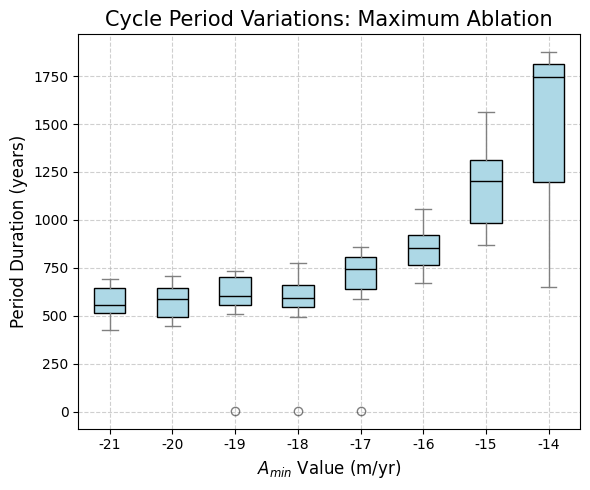

In [111]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(Period_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Cycle Period Variations: Maximum Ablation", fontsize = 15)
ax.set_ylabel("Period Duration (years)", fontsize = 12)
ax.set_xlabel("$A_{min}$ Value (m/yr)", fontsize = 12)
ax.set_xticks(np.arange(1, len(amins) + 1))
ax.set_xticklabels(amins)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/PeriodVariation_Amin.svg", format ="svg", bbox_inches='tight')

Variations in GL Extent - Advance 

In [112]:
amins = np.array([-21, -20, -19, -18, -17, -16, -15, -14])
ExtPos_list = [adv_dists_amin21, adv_dists_amin20, adv_dists_amin19, adv_dists_amin18, adv_dists_amin17, adv_dists_amin16, adv_dists_amin15, adv_dists_amin14]

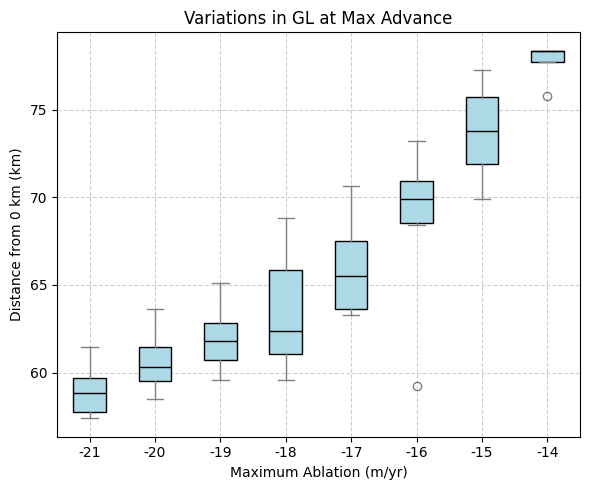

In [113]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Max Advance")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Maximum Ablation (m/yr)")
ax.set_xticks(np.arange(1, len(amins) + 1))
ax.set_xticklabels(amins)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Variations in GL Extent - Retreat 

In [114]:
amins = np.array([-21, -20, -19, -18, -17, -16, -15, -14])
RetPos_list =  [ret_dists_amin21, ret_dists_amin20, ret_dists_amin19, ret_dists_amin18, ret_dists_amin17, ret_dists_amin16, ret_dists_amin15, ret_dists_amin14]

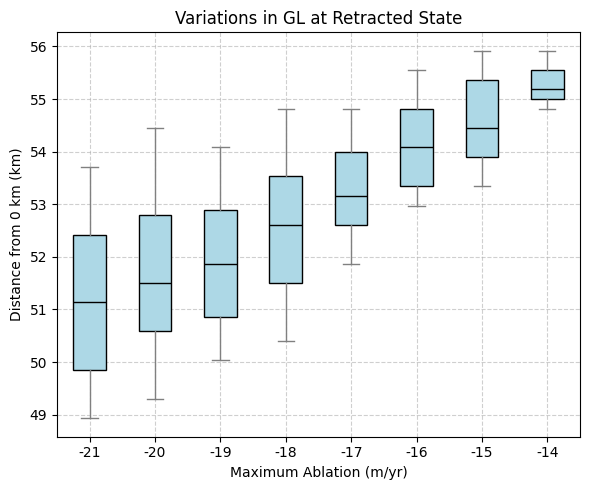

In [115]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Retracted State")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Maximum Ablation (m/yr)")
ax.set_xticks(np.arange(1, len(amins) + 1))
ax.set_xticklabels(amins)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

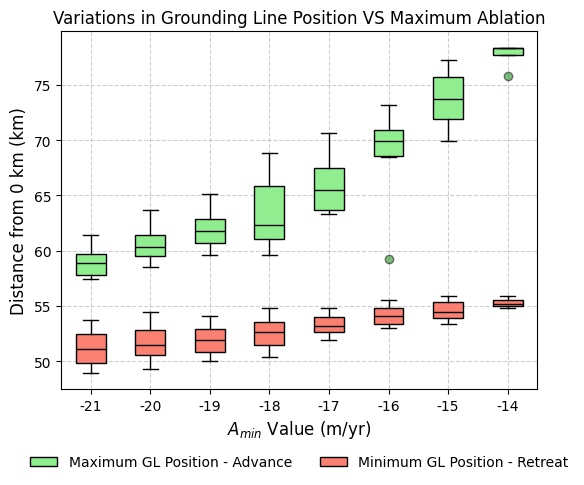

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

D2 = ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='salmon'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='salmon', alpha=0.5))

D1 = ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightgreen'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='green', alpha=0.5))

ax.set_title("Variations in Grounding Line Position VS Maximum Ablation", fontsize = 12)
ax.set_ylabel("Distance from 0 km (km)", fontsize = 12)
ax.set_xlabel("$A_{min}$ Value (m/yr)", fontsize = 12)
ax.legend([D1["boxes"][0], D2["boxes"][0]], ['Maximum GL Position - Advance', 'Minimum GL Position - Retreat'], loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, frameon=False)
ax.set_xticks(np.arange(1, len(amins) + 1))
ax.set_xticklabels(amins)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/GLVariation_Amin.svg", format ="svg", bbox_inches='tight')